<a href="https://colab.research.google.com/github/SCAMT-Institute/EMRIS/blob/main/EMRIS_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Electron Microscopy Reverse Image Search (EMRIS)**

---

Thank You for using our EMRIS tool!

While we develop a more user-friendly app for You, hope You will enjoy a little Python experience.
You can also play with the code according to the instructions after '#' symbols.

With EMRIS You can perform customized reverse image search on SEM/TEM images for nanostructured materials of desired shapes, surface morphologies, and even size distributions!

**ADDITIONAL FUNCTIONS:**

1.   IMAGE DATA AUGMENTATION TOOL
2.   IMAGES VISUALIZATION
3.   CHECK IMAGE FEATURE SPACE
4.   PCA ANALYSIS ON YOUR IMAGE DATASET



---


**LET'S START WITH EMRIS!**


**---> PRESS Ctrl+F9 TO START**


---



**1. FIRST OF ALL, LET'S CONNECT EMRIS TO YOUR GOOGLE DRIVE:**

In [2]:
# <------------------------ RUN THIS PIECE OF CODE BY CLICKING THIS PLAY BUTTON ------------------------

import os
from google.colab import drive
drive.mount('/content/{}'.format(input('Enter Your Google Drive name here (usually, it is called \'gdrive\', without the parentheses): ')), force_remount=True)

Enter Your Google Drive name here (usually, it is called 'gdrive', without the parentheses): GoogleDrive
Mounted at /content/GoogleDrive


**2. NOW, YOU CAN DEFINE PARAMETERS FOR CUSTOMIZED REVERSE IMAGE SEARCH, WHICH IS:**

*   LOCATION OF YOUR FOLDER WITH IMAGES
*   WHAT IS A QUERY IMAGE
*   WHAT NUMBER OF SIMILAR IMAGES DO YOU NEED
*   IS IT A HAND DRAWING SEARCH?

In [3]:
# <------------------------ RUN THIS PIECE OF CODE BY CLICKING THIS PLAY BUTTON ------------------------

print('\033[1m' + 'Find the folder button on the left, then click, find the folder with your images, right click on it, copy its path and paste it here:' + '\033[0m')
folder_with_images = input()
print('\033[1m' + '---> Now we are in Your folder.' + '\033[1m')

print('\n\033[1m' + 'Define query image name, for instance, \'example.tif\', without the parentheses: ' + '\033[1m')
query_image = input()
file_path = os.listdir(folder_with_images)
while query_image not in file_path:
  try:
    if query_image not in file_path:
       print('There is no such a file in Your directory.')
    query_image = input()
  except Error:
    pass
print('---> Query is set.')

print('\n\033[1m' + 'Set the number of similar images to show: ' + '\033[1m')
number_of_similar_images = int(input()) + 1
while (number_of_similar_images - 1) >= len(file_path):
  try:
    if (number_of_similar_images - 1) >= len(file_path):
       print('Number of similar images is equal or greater than the number of images')
    number_of_similar_images = int(input()) + 1
  except Error:
    pass
print('---> Success.')

print('\033[1m' + '\nDo you want to perform image drawing search? (Y/N; No by default)' + '\033[1m')
is_drawing = input()

if is_drawing == 'Y' or is_drawing == 'y' or is_drawing == 'Yes' or is_drawing == 'YES' or is_drawing == 'yes':
  is_drawing = True
  print('---> Done.')
elif is_drawing == None or is_drawing == 'N' or is_drawing == 'n' or is_drawing == 'No' or is_drawing == 'NO' or is_drawing == 'no':
  is_drawing = False
  print('---> Done.')
else:
  raise TypeError('Wrong command')

Find the folder button on the left, then click, find the folder with your images, right click on it, copy its path and paste it here:
/content/GoogleDrive/MyDrive/FROM DRIVE (1)/WORKSPACE/Au from articles
---> Now we are in Your folder.

Define query image name, for instance, 'example.tif', without the parentheses: 
9_290.jpg
---> Query is set.

Set the number of similar images to show: 
4
---> Success.

Do you want to perform image drawing search? (Y/N; No by default)
n
---> Done.


In [4]:
# YOU CAN UNZIP YOUR IMAGES, IF THEY ARE IN .ZIP/.RAR FILE. 
# DO NOT FORGET TO COPY NEW FOLDER PATH TO THE PREVIOUS LINE !!!
# REMOVE THE "#" BELOW IF YOU WANT THIS OPTION TO WORK.

#!unzip zip_file_name.zip



---


**ALGORITHM CORE BEGINS HERE, SO DO NOT COMMIT ANY CHANGES HERE, IF YOU ARE NOT FAMILIAR WITH PYTHON CODING !!!**


---



In [5]:
# IMPORTING ALL LIBRARIES AND VGG16 MODEL

import os
import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
import random
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.decomposition import PCA
import pandas as pd

model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 4s 0us/step


In [6]:
# REMOVE THE '#' SYMBOL BEFORE THE COMMAND BELOW IF YOU WANT TO SEE THE VGG16 CNN ARCHITECTURE

# model.summary()

In [7]:
# READING SEM IMAGES FROM THE FOLDER

file_path = os.listdir(folder_with_images)
print(len(file_path))

14


In [8]:
# REMOVE THE "#" SYMBOLS IF YOU WANT TO PERFORM IMAGE AUGMENTATION ON YOUR DATASET BY ITS FLIPPING.
# IT IS USEFUL FOR IMAGE DATA ANALYSIS AND FURTHER MACHINE LEARNING, FOR INSTANCE, IN NEURAL NETWORKS.

#os.chdir(folder_with_images)
#for image in file_path:
#    path = os.path.abspath(image)
#    c_prev = os.path.split(path)[-1]
#    c = c_prev[:-4]
#    im = cv2.imread(image)
#    im_ud = cv2.flip(im, 0)
#    im_lr = cv2.flip(im, 1)
#    im_ur = cv2.flip(im, -1)
#    img_ud = Image.fromarray(im_ud)
#    img_lr = Image.fromarray(im_lr)
#    img_ur = Image.fromarray(im_ur)
#    img_ud.save(str(c) + "_ud.tif")
#    img_lr.save(str(c) + "_lr.tif")
#    img_ur.save(str(c) + "_ur.tif")

In [9]:
# DEFINE THE FUNCTION FOR READING IMAGES FROM THE FOLDER

def load_image(path):
    img = load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [10]:
# USING THIS YOU CAN SHOW ANY OF THE IMAGES IN THE DATASET.
# AS USUAL - JUST REMOVE "#" BELOW. 

#img, x = load_image(folder_with_images + "/" + input('Type your image name, for example, '1.tif', without the parentheses: ))
#print("shape of x: ", x.shape)
#print("data type: ", x.dtype)
#plt.imshow(img)

In [11]:
# HERE WE DEFINE FEATURE EXTRACTOR (CNN ARCHITECTURE IS ALSO HERE TO SEE THE NUMBER OF FEATURES ON THE LAYERS)

feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feat_extractor.summary()

In [12]:
# HERE YOU CAN CHECK FEATURE SPACE OF A SINGLE IMAGE.

#feat = feat_extractor.predict(x)

#plt.figure(figsize=(16,4))
#plt.plot(feat[0])

IMAGE CONTOUR GENERATOR

---



In [13]:
''' SOON WILL BE HERE 

import cv2
import matplotlib.pyplot as plt
from skimage import measure
import os
import re

os.chdir(folder_with_images)
is_drawing = True
regex = '^\/(.+\/)*(.+)(\/.+)$'
match = re.search(regex, folder_with_images)
folder = '/' + match.group(1) + match.group(2) + '/CONTOURS'

if not os.path.exists(folder):
  parent_path = os.path.dirname(folder_with_images)
  os.chdir(parent_path)
  os.mkdir(parent_path + '/CONTOURS')
  os.chdir(folder_with_images)
  file_path = os.listdir(folder_with_images)

if is_drawing:
  # contour detection and saving

  folder_with_images = folder
  os.chdir(folder)
else:
  pass

'''

" SOON WILL BE HERE \n\nimport cv2\nimport matplotlib.pyplot as plt\nfrom skimage import measure\nimport os\nimport re\n\nos.chdir(folder_with_images)\nis_drawing = True\nregex = '^\\/(.+\\/)*(.+)(\\/.+)$'\nmatch = re.search(regex, folder_with_images)\nfolder = '/' + match.group(1) + match.group(2) + '/CONTOURS'\n\nif not os.path.exists(folder):\n  parent_path = os.path.dirname(folder_with_images)\n  os.chdir(parent_path)\n  os.mkdir(parent_path + '/CONTOURS')\n  os.chdir(folder_with_images)\n  file_path = os.listdir(folder_with_images)\n\nif is_drawing:\n  # contour detection and saving\n\n  folder_with_images = folder\n  os.chdir(folder)\nelse:\n  pass\n\n"



---



In [14]:
# SELECT IMAGES FROM THE FOLDER TO USE

images_path = folder_with_images
image_extensions = ['.tif', '.png', '.jpg', '.bmp', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

In [15]:
# IMAGE FEATURES EXTRACTION

import time
tic = time.clock()

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

analyzing image 0 / 14. Time: 0.0002 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


In [16]:
# FEATURE SPACE COMPRESSION USING PCA

features = np.array(features)
pca = PCA(n_components=len(file_path)-1)
pca.fit(features)
pca_features = pca.transform(features)

In [17]:
# HERE YOU CAN PLOT PRINCIPAL COMPONENT ANALYSIS RESULTS FOR YOUR DATA.

#df = pd.DataFrame(data=pca_features, columns=['pc1', 'pc2'])
#df.plot.scatter(x='pc1', y='pc2', title= "Scatter plot");
#plt.show(block=True);

In [18]:
# PRETTY PCA GRAPHS.

#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#targets = ['cube', 'sphere', 'spike']
#colors = ['#EBACA2', '#BED3C3', '#4A919E']
#for target, color in zip(targets,colors):
#    indicesToKeep = df_shape['shape'] == target
#    ax.scatter(df.loc[indicesToKeep, 'pc1']
#               , df.loc[indicesToKeep, 'pc2']
#               , c = color
#               , s = 35)
#ax.legend(targets)
#ax.grid(False)
#plt.savefig('PCA.eps', format='eps')

In [19]:
# PERFORM K-NEAREST NEIGHBORS CLUSTERING ON YOUR DATASET (PCA IMPLEMENTATION IS NEEDED FOR THIS STEP)

#from sklearn.cluster import KMeans
#
#kmeans = KMeans(n_clusters=3).fit(df)
#centroids = kmeans.cluster_centers_
#print(centroids)
#
#fig_k = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#plt.scatter(df['pc1'], df['pc2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200)
#plt.savefig('KMeans.eps', format='eps')

In [20]:
# HERE QUERY IMAGE IS SET 

os.chdir(folder_with_images + '/')
img = image.load_img(query_image)
n = file_path.index(query_image)
#plt.imshow(img)

In [21]:
# IMAGE SIMILARITY OF A QUERY IMAGE TO OTHER SAMPLES IN THE DATABASE

similar_idx = [ distance.cosine(pca_features[n], feat) for feat in pca_features ]

In [22]:
print(similar_idx)

[1.207169160246849, 1.4089199006557465, 1.4065602123737335, 1.3648564219474792, 1.3349371254444122, 0.30615514516830444, 0.5218102633953094, 0.4726082682609558, 0.0, 0.058552443981170654, 0.9495404809713364, 0.25844770669937134, 1.1685020923614502, 1.3694913983345032]


In [23]:
# SELECT THE MOST 5 SIMILAR IMAGES

idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:(number_of_similar_images+1)]
print(idx_closest)

[9, 11, 5, 7, 6]




YOUR QUERY IMAGE:


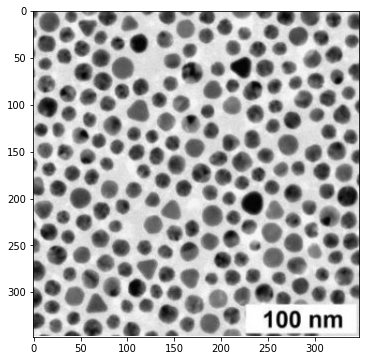

In [46]:
# OPEN N CLOSEST IMAGES IN THE DATASET

thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 224 / img.height), 224))
    thumbs.append(img)

# CONCATENATE IMAGES INTO A SINGLE IMAGE

concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# SHOW TOP N CLOSEST IMAGES IN THE DATASET

query = Image.open(query_image)
plt.figure(figsize = (8,6))
plt.imshow(query)

def cosine(image_name):
  return similar_idx[file_path.index(image_name)]

def how_similar(cosine):
  return 100 - (100 * (cosine - min(similar_idx))/(max(similar_idx) - min(similar_idx)))

print('\n\nYOUR QUERY IMAGE:')



SIMILARITY TABLE:
+-----+--------------+--------------+
|   № | Image Name   |   Similarity |
+=====+==============+==============+
|   1 | 10_350.jpg   |      95.8442 |
+-----+--------------+--------------+
|   2 | 12_291.jpg   |      81.6563 |
+-----+--------------+--------------+
|   3 | 6_248.jpg    |      78.2702 |
+-----+--------------+--------------+
|   4 | 8_287.jpg    |      66.456  |
+-----+--------------+--------------+
|   5 | 7_434.jpg    |      62.9638 |
+-----+--------------+--------------+


TOP 5 SIMILAR IMAGES:


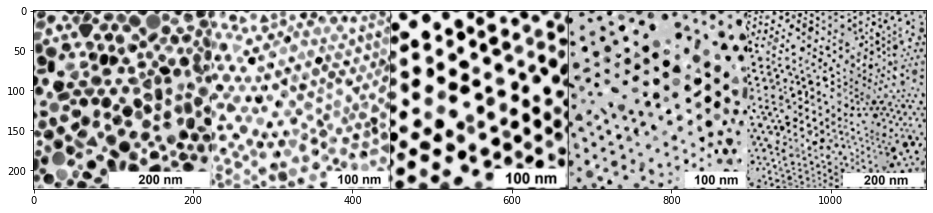

In [45]:
print('\n\nSIMILARITY TABLE:')

from tabulate import tabulate
result = []
for i in range(number_of_similar_images):
  result.append([i+1, file_path[idx_closest[i]], how_similar(cosine(file_path[idx_closest[i]]))])
print(tabulate(result, 
                headers=["№", "Image Name", "Similarity"], 
                tablefmt='grid'))

print('\n\nTOP ' + str(number_of_similar_images) + ' SIMILAR IMAGES:')

plt.figure(figsize = (16,12))
plt.imshow(concat_image)
pass